In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob

In [2]:
def amean(da,cf=1/365):
    #annual mean
    m  = da['time.daysinmonth']
    xa = cf*(m*da).groupby('time.year').sum().compute()
    xa.name=da.name
    xa.attrs=da.attrs
    return xa

def gmean(da,la):
    x=1/la.sum()*(da*la).sum(dim=['lat','lon'])
    x.name=da.name
    x.attrs=da.attrs
    return x

In [8]:
d='/glade/scratch/djk2120/archive/TRENDY2023_f09_spinPostAD/lnd/hist/'
files=sorted(glob.glob(d+'*'))
tmp=xr.open_dataset(files[0])
la=tmp.area*tmp.landfrac

In [5]:
def pp(ds):
    dvs=['TOTVEGC','TOTSOMC','TOTECOSYSC','GPP','TLAI']
    return ds[dvs]

In [6]:
ds=xr.open_mfdataset(files,combine='by_coords',preprocess=pp,decode_times=False)
nt=len(ds.time)
ds['time']=np.arange(nt)
ds=ds.isel(time=np.arange(nt)>0)

In [15]:
x[:10].values

array([20502.69705177, 20503.37588473, 20504.37571621, 20504.74758336,
       20504.21960217, 20504.59673159, 20504.07752086, 20503.7793255 ,
       20504.14417629, 20504.33361804])

(18000.0, 21000.0)

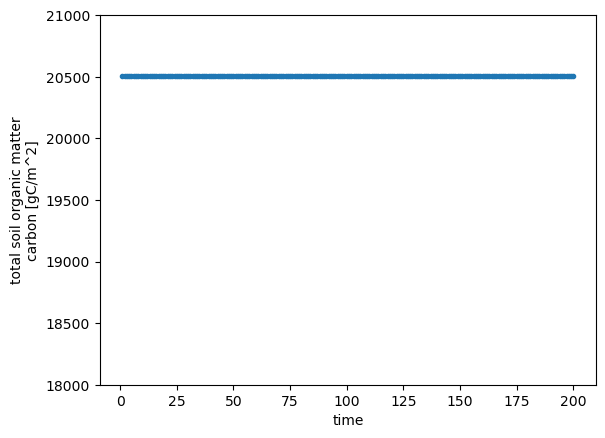

In [18]:
x=gmean(ds.TOTSOMC,la)
x.plot.line('.')
plt.ylim([18000,21000])

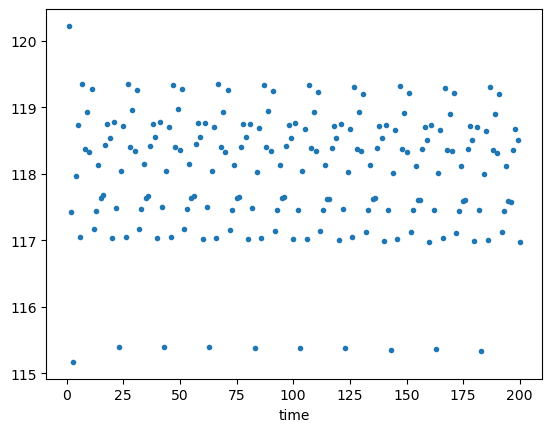

In [9]:
x=1e-9*24*60*60*365*la.sum()*gmean(ds.GPP,la)
x.plot.line('.')

In [3]:
d='/glade/scratch/djk2120/archive/TRENDY2023_f09_spinAD/lnd/hist/'
files=sorted(glob.glob(d+'*'))

In [4]:
def pp(ds):
    dvs=['TOTVEGC','TOTSOMC','TOTECOSYSC','GPP','TLAI']
    return ds[dvs]

In [6]:
ds=xr.open_mfdataset(files,combine='by_coords',preprocess=pp,decode_times=False)
nt=len(ds.time)
ds['time']=np.arange(nt)
ds=ds.isel(time=np.arange(nt)>0)

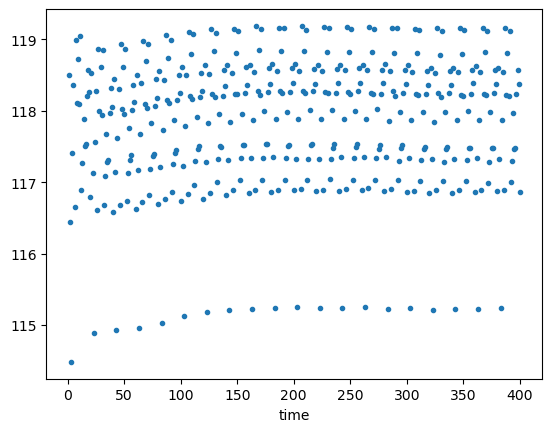

In [8]:
x=1e-9*24*60*60*365*la.sum()*gmean(ds.GPP,la)
x.plot.line('.')

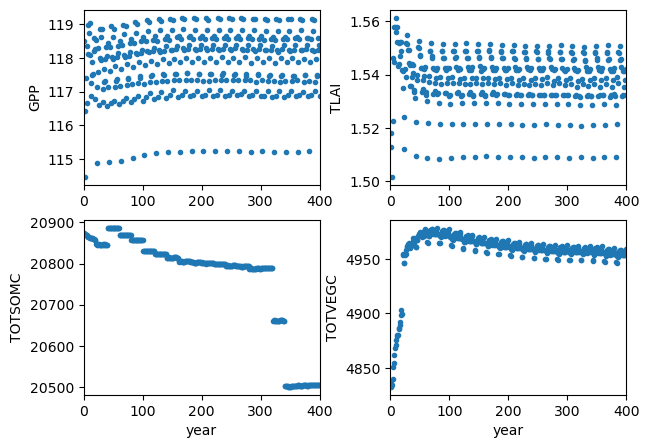

In [10]:
plt.figure(figsize=[7,5])
for i,v in enumerate(['GPP','TLAI','TOTSOMC','TOTVEGC']):
    plt.subplot(2,2,i+1)
    x=gmean(ds[v],la)
    if v=='GPP':
        x=1e-9*24*60*60*365*la.sum()*x
    x.plot.line('.')
    plt.ylabel(v)
    plt.xlim([0,400])
    if i<2:
        plt.xlabel('')
    else:
        plt.xlabel('year')
plt.subplots_adjust(wspace=0.3)
plt.savefig('spinAD.png',dpi=300,bbox_inches='tight')

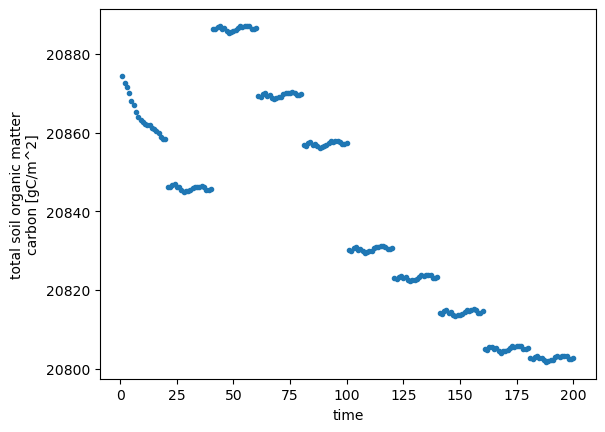

In [34]:
gmean(ds.TOTSOMC,la).plot.line('.')